<a href="https://colab.research.google.com/github/nayan-khemka/Machine-Learning-Data-Analytics-LAB/blob/main/20BCE1884_ML_LAB_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Checking Linearity


## LAB-3 20BCE1884







### Importing packages

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
import seaborn as sns

### Create our own data

In [ ]:

df=pd.read_csv('Admission_Predict.csv')
print(df.head())

x=df[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research']]
y=df['Chance of Admit ']

   Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   

   Research  Chance of Admit   
0         1              0.92  
1         1              0.76  
2         1              0.72  
3         1              0.80  
4         0              0.65  


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

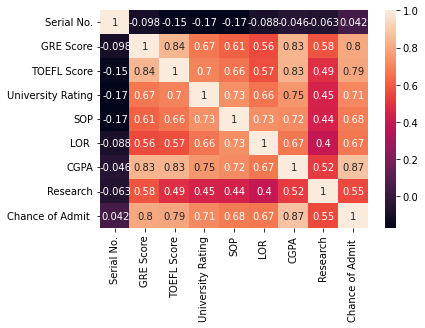

In [ ]:
import seaborn as sb
data_corr = df.corr()
sb.heatmap(data_corr,annot=True)

### Modeling

In [ ]:
from sklearn import linear_model
mlr = linear_model.LinearRegression()
#Fitting the Multiple Linear Regression model
# mlr = LinearRegression()  
mlr.fit(x_train, y_train)
#print(train_x)
#print(train_y)


#Intercept and Coefficient
print("Intercept: ", mlr.intercept_)
print("Coefficients:",mlr.coef_)
list(zip(x, mlr.coef_))




Intercept:  -1.3006402697071477
Coefficients: [ 0.00175031  0.00351448  0.00773337 -0.00202848  0.01675672  0.11747256
  0.01932996]


[('GRE Score', 0.0017503077352629976),
 ('TOEFL Score', 0.0035144815034511903),
 ('University Rating', 0.007733366454063786),
 ('SOP', -0.0020284750405224873),
 ('LOR ', 0.016756717379406805),
 ('CGPA', 0.11747256220477635),
 ('Research', 0.019329963566449577)]

#### Plot outputs

In [ ]:
#Prediction of test set
y_pred_mlr= mlr.predict(x_test)

#Predicted values
print("Prediction for test set: {}".format(y_pred_mlr))

Prediction for test set: [0.71016725 0.64659456 0.67392638 0.90992514 0.62870896 0.50254284
 0.79934859 0.84948875 0.60590784 0.61949658 0.68807143 0.92141634
 0.79569831 0.67978615 0.80644492 0.84090078 0.88264854 0.50019122
 0.87903097 0.69516356 0.77212446 0.78789309 0.71762445 0.72090775
 0.5392125  0.54964435 0.70222591 0.67581669 0.90034936 0.63968181
 0.65664138 0.95924422 0.76127231 0.70493768 0.7974913  0.69343129
 0.80908328 0.89965795 0.51756867 0.66634333 0.78028043 0.57366887
 0.76437891 0.59785856 0.80944283 0.59337336 0.77640782 0.6528367
 0.85775233 0.85660983 0.95433771 0.58265523 0.64959458 0.78348046
 0.52006062 0.71399163 0.6541951  0.69187404 0.81240922 0.82598789
 0.62882791 0.71103351 0.67926911 0.77245985 0.59994907 0.42553959
 0.69899544 0.53688661 0.82184998 0.78748048 0.66048334 0.6744229
 0.68017508 0.50715738 0.72690513 0.83190837 0.82826113 0.70941547
 0.74166545 0.42569048 0.81828285 0.65638601 0.99882097 0.57177228
 0.60283218 0.83981232 0.74676762 0.785

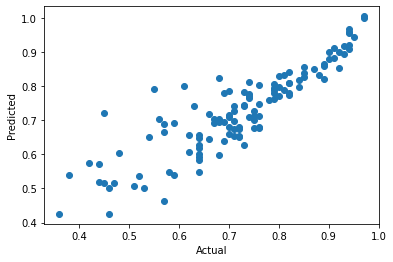

In [ ]:
#Actual value and the predicted value
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_mlr})
mlr_diff.head()

plt.scatter(y_test,y_pred_mlr);
plt.xlabel('Actual');
plt.ylabel('Predicted');

In [ ]:
from sklearn.metrics import r2_score
Accuracy=r2_score(y_test,y_pred_mlr)*100
print(" Accuracy of the model is %.2f" %Accuracy)

 Accuracy of the model is 77.62


## WITHOUT SKLEARN

In [ ]:
#NORMALIZING DATA
my_data=df[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research','Chance of Admit ']]
my_data = (my_data - my_data.mean())/my_data.std()
my_data.head()
x=my_data[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research']]
y=my_data['Chance of Admit ']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size = 0.3)

In [ ]:
def CostFunction(x,y,w,b):
    cost = np.sum((((x.dot(w) + b) - y) ** 2) / (2*len(y)))
    return cost

def GradientDescent(x, y, w, b, learning_rate, epochs):
    cost_list = [0] * epochs
   
    for epoch in range(epochs):
        z = x.dot(w) + b
        loss = z - y
        
        weight_gradient = x.T.dot(loss) / len(y)
        bias_gradient = np.sum(loss) / len(y)
        
        w = w - learning_rate*weight_gradient
        b = b - learning_rate*bias_gradient
  
        cost = CostFunction(x, y, w, b)
        cost_list[epoch] = cost
        
    return w, b, cost_list

In [ ]:
w, b, c= GradientDescent(x_train, y_train, np.zeros(x_train.shape[1]), 0, 0.002,epochs=15000)

In [ ]:
def predict(X, w, b):
    return X.dot(w) + b
y_pred = predict(x_test, w, b)

print(y_test, y_pred)

254    0.881078
354   -0.942084
324   -0.381111
50     0.249984
395    0.670713
         ...   
351    0.039619
337    1.512173
168   -0.591476
247   -0.100625
96    -1.713422
Name: Chance of Admit , Length: 120, dtype: float64 254    0.706421
354   -1.422837
324   -0.504988
50    -0.290110
395    0.545121
         ...   
351    0.379061
337    1.428493
168   -1.164778
247   -0.403850
96    -0.970958
Length: 120, dtype: float64


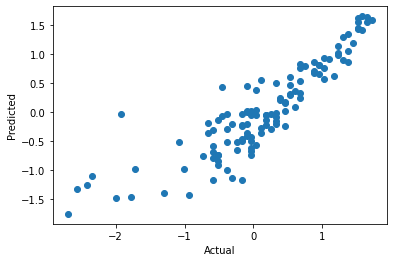

In [ ]:
#Actual value and the predicted value
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
mlr_diff.head()

plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

In [ ]:
def r2score(y_pred, y):
    rss = np.sum((y_pred - y) ** 2)
    tss = np.sum((y-y.mean()) ** 2)
    
    r2 = 1 - (rss / tss)
    return r2
Accuracy=r2score(y_pred, y_test)*100
print(" Accuracy of the model is %.2f" %Accuracy)

 Accuracy of the model is 77.57


# SKLEARN is more accurate because:

The main reasons are:

1. Gradient Descent is slow — iteratively approaching the minimum takes quite a bit of time, especially computing the gradient. 

2. It does not arrive exactly at the minimum — with the gradient descent, you are guaranteed to never get to the exact minimum, be it local or global one.

3. It introduces new hyperparameter alpha — you have to optimize the learning rate alpha, which is a tradeoff between speed (approaching minimum faster) and accuracy (arriving closer to the minimum). 